## Opacity vs Density

### Summary of NeRF Rendering Process

To compute the final colour for a pixel, NeRF users volumetric rendering which works by integrating colour and density values along each ray through *alpha compositing*. 

The rendering process is summarised as

1. Sample 3D points $(x,y,z)$ along the ray from the camera origin through the query pixel $(i,j)$.
2. For a 3D point $i$, query the network for density $\sigma_{i}$ and colour $c_{i}$ representing as r,g,b.

$$
\begin{equation}
(\sigma_{i}, c_{i}) = MLP(x_{i}, dir_{i})
\end{equation}
$$

3. Convert density $\sigma_{i}$ to opacity $\alpha_{i}$ as $\alpha_{i} = 1 - exp(-\sigma_i \delta_i)$.
4. Knowing the opacity $\alpha_{i}$, we can compute the transparency as $(1 - \alpha_{i})$.
5. Compute transmittance for each point based on transparency as $T_i = \prod_{j=1}^{i-1}(1 - \alpha_{i})$ indicating how much light is left before reaching the point $i$.
6. Accumulate colour contributions along the ray as $C = \sum_{i}T_i \alpha_i c_i$


### Opacity vs Density

* density $\sigma_{i}$ returned by the NeRF model is sued to compute opacity $\alpha_{i}$ indicating how much point $i$ block light.
* High density $\sigma$ results in high opacity $\alpha$ (close to 1) meaning that the point blocks more light and contributes more to the final image.
* Low density $\sigma$ results in low opacity $\alpha$ (close to 0) meaning that the point is nearly transparent and contributes less to the final image.
    * When $\sigma_i$ is large, ${1}/{e^{\sigma_i \delta_i}}$ becomes small resulting in high opacity (close to 1).
    * When $\sigma_i$ is small, ${1}/{e^{\sigma_i \delta_i}}$ becomes large resulting in less opacity (close to 0).
  
$$
\begin{equation}
\alpha_{i} = 1 - exp(-\sigma_i \delta_i) = 1 - \frac{1}{e^{\sigma_i \delta_i}}
\end{equation}
$$


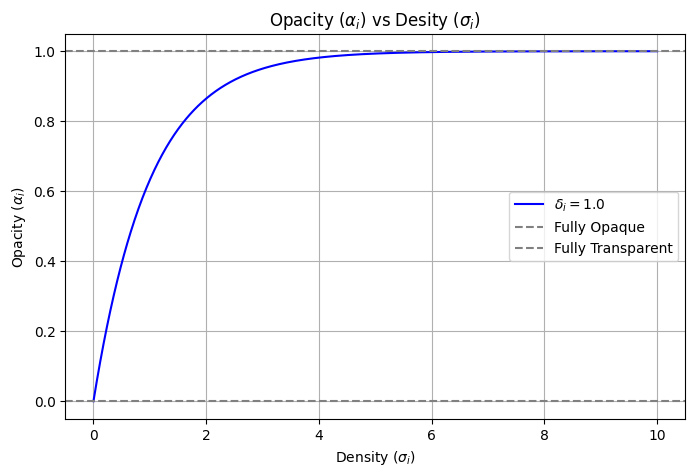

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rante of sigma and delta values
# Since sigma in the network is passed through ReLU(), it's greater than 0.
sigma_values = np.linspace(0, 10, 1000)
delta = 1.0 # uniform distance between sample

# Compute alpha
alpha_values = 1 - np.exp(-sigma_values * delta)

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(sigma_values, alpha_values, label=r'$\delta_i=1.0$', color='blue')
plt.axhline(1.0, color='gray', linestyle='--', label='Fully Opaque')
plt.axhline(0.0, color='gray', linestyle='--', label='Fully Transparent')
plt.title(r'Opacity ($\alpha_i$) vs Desity ($\sigma_i$)')
plt.xlabel(r'Density ($\sigma_i$)')
plt.ylabel(r'Opacity ($\alpha_i$)')
plt.legend()
plt.grid(True)
plt.show()